# Exploring Database

In this notebook, we'll get acquainted with our Curriculum Lattes database by answering some initial questions about it. 

-----

**First of all, let's import a few things...**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Importing dataframe...**

In [2]:
df = pd.read_csv('views/Papers.csv', sep=';', encoding='latin-1', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138465 entries, 0 to 138465
Data columns (total 9 columns):
@NUMERO-IDENTIFICADOR    135027 non-null float64
_id                      138465 non-null object
NOME-COMPLETO            138465 non-null object
TITULO-DO-ARTIGO         138465 non-null object
ANO-DO-ARTIGO            138465 non-null object
JOURNAL                  138101 non-null object
PALAVRAS-CHAVE-ARTIGO    68947 non-null object
COAUTORES                138465 non-null object
CHAVE_ARTIGO             138465 non-null object
dtypes: float64(1), object(8)
memory usage: 10.6+ MB


<br>

Now that we already have our dataset ready, let's begin exploring some preliminaries information about the profile of mathematical research in Brazil.

We'll begin answering some simple questions, like..

----


**How many brazilian researchers are there in the mathematical field?**

In [3]:
print('# of researchers in "great" mathematics field: ', df['_id'].unique().shape[0])

# of researchers in "great" mathematics field:  9984


**How many published papers we have in our database?**

In [145]:
# removing duplicate publications
df.sort_values(by='ANO-DO-ARTIGO', inplace=True, ascending=False)

In [146]:
df_pub_unique = df.drop_duplicates("CHAVE_ARTIGO", keep='first')

In [134]:
print('# de publicações removidas: ', df.shape[0] - df_pub_unique.shape[0])

# de publicações removidas:  27561


In [135]:
print('# of publications:', df_pub_unique['CHAVE_ARTIGO'].unique().shape[0])

# of publications: 110904


<br>

**Now, let's take a closer look at the number of published papers and try to separate in years.**

In [136]:
# preparing dataframe to plot (from 1980 to 2019 - that's why [:39])
df_plot = pd.DataFrame(df_pub_unique['ANO-DO-ARTIGO'].value_counts(ascending=False)[:39]).copy()
df_plot.sort_index(inplace=True)

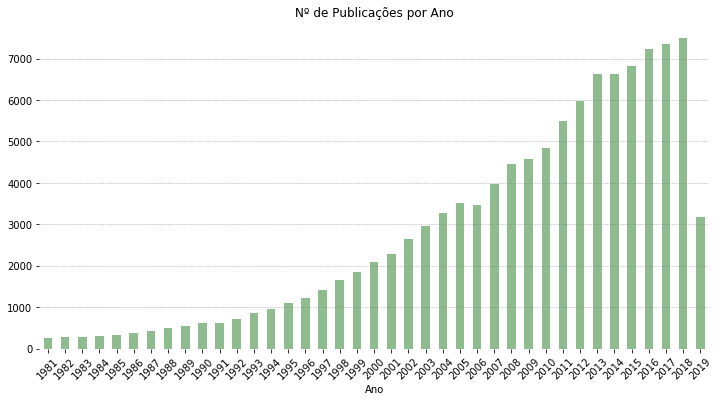

In [137]:
# preparing plot
ax = df_plot.plot(kind='bar', legend=False, title='Nº de Publicações por Ano', figsize=(12,6),
                 color='darkseagreen')

# removing frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# horizontal grid lines
ax.yaxis.grid(zorder=0,which="major", color='gray', linestyle=':', linewidth=0.6)

# x-ticks
plt.xlabel('Ano')
plt.xticks(rotation=45)

#saving fig
plt.savefig('Publicacoes_por_ano.png', bbox_inches='tight')

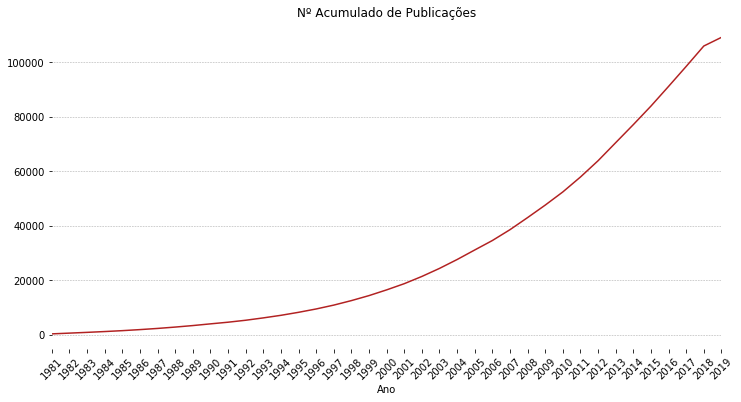

In [138]:
# cumulative publications
df_plot['cumulative'] = df_plot.cumsum()

# plotting
ax = df_plot['cumulative'].plot(color='firebrick', figsize=(12,6), title='Nº Acumulado de Publicações')

# removing frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# horizontal grid lines
ax.yaxis.grid(zorder=0,which="major", color='gray', linestyle=':', linewidth=0.6)

# preparing x-ticks
labels = sorted(list(df_plot.index))
plt.xticks(np.arange(len(labels)), labels)

plt.xlabel('Ano')
plt.xticks(rotation=45)

# saving fig
plt.savefig('Publicacoes_acumulado.png', bbox_inches='tight')

<br>

**What about the Journals with most publications?**

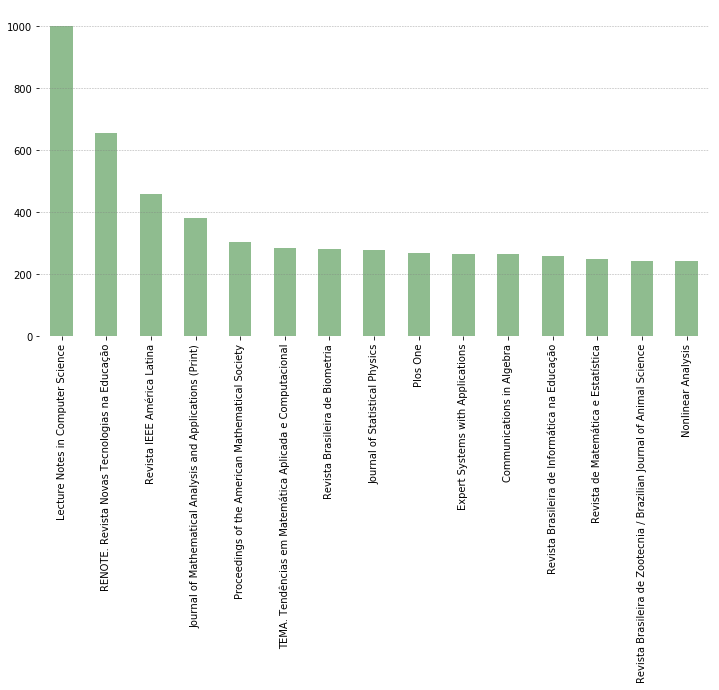

In [140]:
ax = df_pub_unique['JOURNAL'].value_counts()[:15].plot(kind='bar', color='darkseagreen', figsize=(12,6))

# removing frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# horizontal grid lines
ax.yaxis.grid(zorder=0,which="major", color='gray', linestyle=':', linewidth=0.6)
#plt.ylim(0,1200)

# x-ticks
plt.xticks(rotation=90)

plt.savefig('Journals.png', bbox_inches='tight')

<br>

**Moving on, let's segmentate these numbers per field of research**

To do this, we'll import one more dataframe.

In [141]:
authors = pd.read_csv('views/Authors.csv', sep=';', encoding='latin-1', index_col=0)
authors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11418 entries, 0 to 11417
Data columns (total 15 columns):
@DATA-ATUALIZACAO        11418 non-null object
@NUMERO-IDENTIFICADOR    10960 non-null float64
_id                      11418 non-null object
NOME-COMPLETO            11418 non-null object
AREA-ATUACAO             11405 non-null object
GRANDE-AREA              11418 non-null object
AREA                     11413 non-null object
SUB-AREA                 9042 non-null object
ESPECIALIDADE            5921 non-null object
NOME-INSTITUICAO         9947 non-null object
UF-INSTITUICAO           9268 non-null object
PAIS-INSTITUICAO         10000 non-null object
PAIS                     10416 non-null object
NOME-CITACOES            11418 non-null object
CODIGO-INSTITUICAO       9948 non-null object
dtypes: float64(1), object(14)
memory usage: 1.4+ MB


In [142]:
print('# of Authors:', authors['NOME-COMPLETO'].unique().shape[0])

# of Authors: 11418


Note that, the number above if higher then what we had before. That's because some authors didn't publish any paper or, at least, haven't updated their Lattes curriculum with their publications. So...

In [143]:
print("# of authors that didn't publish any paper:", 
      authors['NOME-COMPLETO'].unique().shape[0] - df['_id'].unique().shape[0])

# of authors that didn't publish any paper: 1434


Note that, surprisingly, we have more research areas than the three we were focusing on. The logical explanation behind this is that CNPQ reports these curricula as belonging to the field of *Mathematics*, for example, but the authors of some curricula may autoreport in a different field.

So, as our main focus is in *Mathematics, Statistics and Computer Sciences*, we'll aggregate the counting of the other fields into *Mathematics*.

In [144]:
# counting authors in every field
df_plot = pd.DataFrame(authors['AREA'].value_counts()).transpose()

# aggregating other fields in "Outras"
df_plot['Matemática'] = df_plot['Matemática'] + df_plot.iloc[:,3:].sum(axis=1)

# dropping other fields
#df_plot = pd.concat([df_plot.iloc[:,:3], df_plot.iloc[:,-1]], axis=1).transpose()

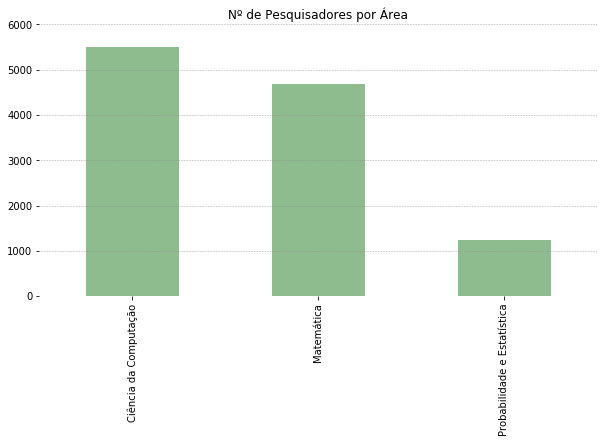

In [170]:
# plotting
ax = df_plot.transpose().iloc[:3,:].plot(kind='bar', color='darkseagreen', figsize=(10,5), legend=False,
                 title='Nº de Pesquisadores por Área')

# removing frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# horizontal grid lines
ax.yaxis.grid(zorder=0,which="major", color='gray', linestyle=':', linewidth=0.6)
plt.ylim(0,6000)

# x-ticks
plt.xticks(rotation=90)

plt.savefig('Pesquisadores_area.png', bbox_inches='tight')

<br>

**Now, let's sort all authors according to the number of publications**

In [ ]:
# ranking of publications
authors_ranking = df_pub_unique['NOME-COMPLETO'].value_counts().copy()

# organizing the ranking dataframe
authors_ranking = pd.DataFrame(authors_ranking).reset_index()

# renaming columns
authors_ranking.rename(columns={'index':'NOME-COMPLETO', 'NOME-COMPLETO':'N_PUBLICACOES'}, inplace=True)

# saving to csv
authors_ranking.to_csv('ranking_autores.csv', sep=';', encoding='latin-1',
                                                    header=False)

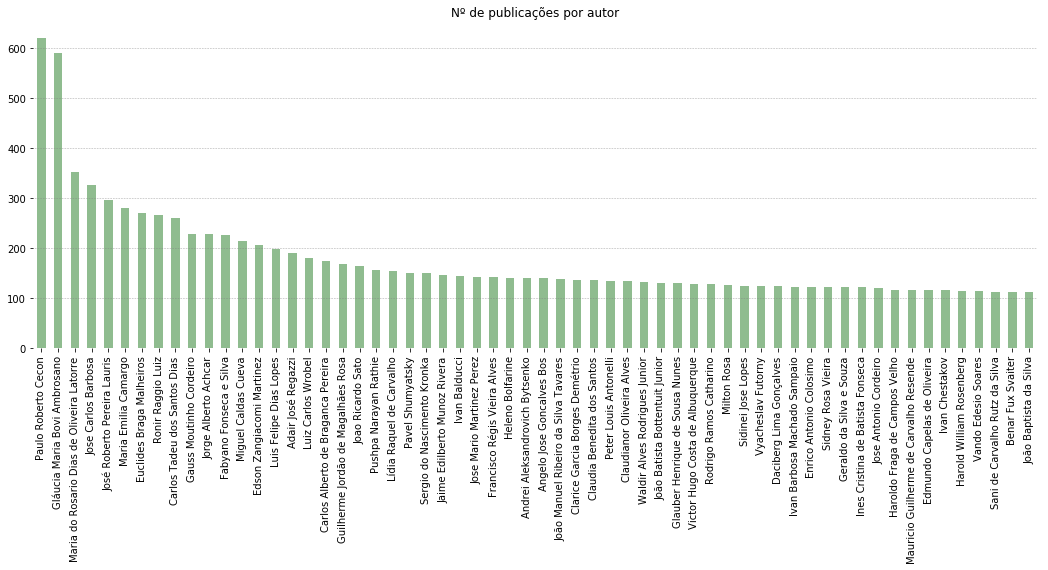

In [172]:
ax = authors_ranking[:60].plot(kind='bar', color='darkseagreen', legend=False, figsize=(18,6),
                               title='Nº de publicações por autor')

# removing frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# horizontal grid lines
ax.yaxis.grid(zorder=0,which="major", color='gray', linestyle=':', linewidth=0.6)
#plt.ylim(0,6000)

# x-ticks
plt.xticks(rotation=90)

plt.savefig('Ranking_autores.png', bbox_inches='tight')

In [177]:
authors_ranking.head()

,NOME-COMPLETO,N_PUBLICACOES
0,Paulo Roberto Cecon,621
1,Gláucia Maria Bovi Ambrosano,590
2,Maria do Rosario Dias de Oliveira Latorre,353
3,Jose Carlos Barbosa,326
4,José Roberto Pereira Lauris,296


In [ ]:
#fazer merge com authors pelo nome completo
#fazer ranking por area

## Choropleth Map of Publications

In [13]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 

In [14]:
temp = pd.DataFrame(df['PAIS'].value_counts())
temp.reset_index(inplace=True)

In [15]:
temp = pd.melt(temp, id_vars='index', value_vars='PAIS')
temp.head()

,index,variable,value
0,Brasil,PAIS,116920
1,Peru,PAIS,1495
2,Argentina,PAIS,1303
3,Itália,PAIS,1145
4,Rússia,PAIS,977


In [16]:
temp.head()

,index,variable,value
0,Brasil,PAIS,116920
1,Peru,PAIS,1495
2,Argentina,PAIS,1303
3,Itália,PAIS,1145
4,Rússia,PAIS,977


<font color='red'>Para ficar 100%, falta passar o nome dos países para inglês </font>

In [18]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        reversescale = True,
        locations = temp['index'],
        locationmode = "country names",
        text = '',
        z = temp['value'],
        colorbar = {'title' : '# of Researchers'},
      ) 

layout = dict(title = 'Number of researchers in database from each country',
                geo = dict(showframe = False,projection = {'type':'equirectangular'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [140]:
choromap.write_image('test.png')

OBS: salvar em figura não fica tão bom... 

Mas dá para salvar em html com o comando: figure.write_html()